Alex Sewon Kim 26481817 

# Economic Productivity : Research and Development

The aim of this project is to analyze the factors that determine the level of R&D and its productivity. Economic production function and endogenous growth theory have discussed in various economic literatures. Thanks to growth economists, we implement assumptions from the exisiting studies to study our research interest.

Data used in this project was collected from various publicly available sources including OECD, UIS:Unesco Institute of Statistics, and United Nation World Investment Report. While this project consists of data of 34 countries in 2003, some of the missing data were replaced by an average of data from 2002 and 2004.

# Data Description

$gerd$_$res$ - Gross expenditures on Research and Development (in millionUS PPP) per researchers 

$def$_$gboard$ - Defence oriented Research share with respect to government budget for R&D


$shbrd$ - Percent of domestic expenditures on Research and Development from the business sectors 

$shbres$ - percentage researchers in the business sector with respect to the total amount

$shbasr$ - Basic research expenditures as a percentage of total research expenditures

$researchers$ - Number of full time equivalent scientists
and engineers

$FEES$ - Cumulated administrative patenting fees for the "average"
patent that includes filing, search, examination and granting fees

$ip$_$index$ - IP Index of patent
rights. The index ranges from 0 to
5, weak to strong

$HKI$ - Human Capital Index, calculated from the literacy rate, secondary enrolments and tertiary enrolments. This is calculated on scale from 0 to 1 


$Triadic$ - Number of Triadic patent applications,  filled simultaneously in Europe, Japan and United States.

$NPF$ - Number of National Patent filings, counts all patents filed in a country.

# Preparation 
Several key python package that will be used throughout this project are imported.

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels . api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import itertools

In [3]:
#Location of the Data Files and importing data 
data = pd.ExcelFile("/Users/Alex/Desktop/econ_c142/Dataset.xls")
df = pd.read_excel(data)

#add logarithmic terms for each variables 
lngerd_res = np.log(df['gerd_res'])
lndef_gboard = np.log(df['def_gboard'])
lnshbrd = np.log(df['shbrd'])
lnshbres = np.log(df['shbres'])
lnshbasr = np.log(df['shbasr'])
lnTriadic = np.log(df['Triadic'])
lnResearchers = np.log(df['Researchers'])
lnHKI = np.log(df['HKI'])
lnFEES = np.log(df['FEES'])
lnip_index = np.log(df['ip_index'])
lnNPF = np.log(df['NPF'])


df['lngerd_res']=lngerd_res
df['lndef_gboard']=lndef_gboard
df['lnshbrd']=lnshbrd
df['lnshbres']=lnshbres
df['lnshbasr']=lnshbasr
df['lnTriadic']=lnTriadic
df['lnResearchers']=lnResearchers
df['lnHKI']=lnHKI
df['lnFEES']=lnFEES
df['lnip_index']=lnip_index
df['lnNPF']=lnNPF
df

,country_name,country,gerd_res,def_gboard,shbrd,shbres,shbasr,Triadic,Researchers,HKI,...,lndef_gboard,lnshbrd,lnshbres,lnshbasr,lnTriadic,lnResearchers,lnHKI,lnFEES,lnip_index,lnNPF
0,Austria,AT,0.219911,1.000000e-12,67.25,63.6,17.500000,281,24124,0.875,...,-27.631021,4.208417,4.152613,2.862201,5.638355,10.090962,-0.133531,6.416732,1.549688,6.904389
1,Australia,AU,0.139100,6.040000e+00,53.40,28.0,23.100000,409,73344,0.971,...,1.798404,3.977811,3.332205,3.139833,6.013715,11.202916,-0.029429,6.356108,1.432701,6.800029
2,Belgium,BE,0.190905,3.400000e-01,69.68,52.5,NaN,340,30901,0.924,...,-1.078810,4.243913,3.960813,NaN,5.828946,10.338544,-0.079043,6.974479,1.398717,5.652189
3,Brazil,BR,0.196700,1.600000e+00,48.29,36.1,17.400000,55,59838,0.579,...,0.470004,3.877224,3.586293,2.856470,4.007333,10.999396,-0.546453,6.459904,1.115142,8.196235
4,Canada,CA,0.163382,3.770000e+00,57.08,62.2,19.215687,712,112624,0.914,...,1.327075,4.044454,4.130355,2.955727,6.568078,11.631810,-0.089925,7.111512,1.360977,7.855525
5,Switzerland,CH,0.294200,4.000000e-01,73.70,49.8,28.400000,794,25808,0.799,...,-0.916291,4.300003,3.908015,3.346389,6.677083,10.158440,-0.224394,6.967909,1.398717,6.167857
6,China,CN,0.066276,NaN,62.37,56.2,4.424779,253,862108,0.298,...,NaN,4.133084,4.028917,1.487220,5.533389,13.667136,-1.210662,7.759187,0.908259,10.845226
7,Czech Republic,CZ,0.145562,3.340000e+00,60.99,41.5,25.217390,15,15809,0.701,...,1.205971,4.110710,3.725693,3.227534,2.708050,9.668335,-0.355247,6.008813,1.258461,6.307616
8,Germany,DE,0.221361,6.520000e+00,69.73,60.2,24.170616,6176,268943,0.810,...,1.874874,4.244631,4.097672,3.185138,8.728426,12.502255,-0.210721,6.095825,1.508512,10.426997
9,Denmark,DK,0.170091,1.120000e+00,69.10,59.2,16.733068,233,25546,0.934,...,0.113329,4.235555,4.080922,2.817387,5.451038,10.148236,-0.068279,6.977281,1.432701,5.736035


As $shbasr$ (basic research) and $deg$_$gboard$ (government expenditure on defence-oriented research) are not available for some countires, those countries are dropped in the process of data clean up, which leaves 26 countries to be examined in this analysis. (Excluded countries: Belgium- China- Finland- Greece- Netherland- Singapore- Turkey- South Africa) 

In [4]:
df=df.dropna()
df.describe(percentiles=[.05, .25, .75, .95])

,gerd_res,def_gboard,shbrd,shbres,shbasr,Triadic,Researchers,HKI,FEES,ip_index,...,lndef_gboard,lnshbrd,lnshbres,lnshbasr,lnTriadic,lnResearchers,lnHKI,lnFEES,lnip_index,lnNPF
count,26.000000,2.600000e+01,26.000000,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.153859,1.154462e+01,56.322692,45.523077,21.618027,1813.269231,1.556700e+05,0.811038,1101.346154,3.862308,...,-1.708359,3.984177,3.727441,3.035224,5.365581,11.030265,-0.240778,6.652538,1.337063,7.697643
std,0.067021,1.562981e+01,15.685281,17.561693,6.247650,4161.307185,2.825646e+05,0.166775,1143.128617,0.621310,...,9.663767,0.332644,0.467370,0.279905,2.291321,1.312525,0.288309,0.820817,0.178401,2.216442
min,0.035312,1.000000e-12,22.300000,11.700000,12.738854,3.000000,9.626000e+03,0.247000,165.000000,2.180000,...,-27.631021,3.104587,2.459589,2.544657,1.098612,9.172223,-1.398367,5.105945,0.779325,4.103816
5%,0.042653,1.000000e-12,28.852500,19.000000,14.082138,9.250000,1.132425e+04,0.502500,224.500000,2.890000,...,-27.631021,3.358715,2.944073,2.644784,2.223565,9.317608,-0.691792,5.398011,1.061097,4.793305
25%,0.120253,1.240000e+00,47.510000,30.650000,16.899801,48.500000,2.177275e+04,0.791500,468.500000,3.520000,...,0.202497,3.860896,3.421519,2.827158,3.881407,9.986556,-0.233840,6.145685,1.258461,6.103344
50%,0.152365,4.120000e+00,59.155000,47.800000,19.625350,200.000000,5.921650e+04,0.857000,700.500000,4.025000,...,1.412232,4.079680,3.866150,2.976822,5.284516,10.988900,-0.154373,6.547926,1.392506,7.233794
75%,0.195398,1.912000e+01,68.407500,59.725000,24.984471,773.500000,1.428225e+05,0.911750,1187.500000,4.190000,...,2.938900,4.225482,4.089738,3.218122,6.649832,11.863645,-0.092399,7.077954,1.432701,9.300168
95%,0.257261,4.724000e+01,74.822500,70.200000,33.779761,12365.000000,6.089412e+05,0.967500,3258.750000,4.662500,...,3.836582,4.315112,4.251345,3.519833,9.364801,13.298058,-0.033060,8.074849,1.539394,11.302568
max,0.294200,5.489000e+01,76.090000,73.600000,34.782609,16037.000000,1.334628e+06,0.982000,5329.000000,5.000000,...,4.005331,4.331917,4.298645,3.549118,9.682654,14.104163,-0.018164,8.580919,1.609438,12.626328


# Visualization of Raw Data
By looking at different metrics of R&D, relative positions of countries in R&D can be inferred

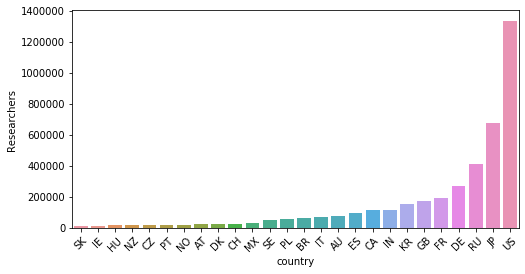

In [10]:
# Visualization of Number of Researchers by Countries
plt.figure(figsize=(8,4))
plt.xticks(rotation= 45)
Graph1 = df.groupby(["country"])['Researchers'].aggregate(np.median).reset_index().sort_values('Researchers')
sns.barplot(x='country', y="Researchers", data=df, order=Graph1['country'])
plt.show()

United States has the most number of researchers worldwide,

Korea is ranked 7th, 

Portugal(PT) does not have many resesarchers relative to other countries.

In [311]:
#descriptive statistics for number of researchers

dfR = df[['Researchers']]
print (dfR.describe(percentiles=[.05, .25, .75, .95]))

        Researchers
count  2.600000e+01
mean   1.556700e+05
std    2.825646e+05
min    9.626000e+03
5%     1.132425e+04
25%    2.177275e+04
50%    5.921650e+04
75%    1.428225e+05
95%    6.089412e+05
max    1.334628e+06


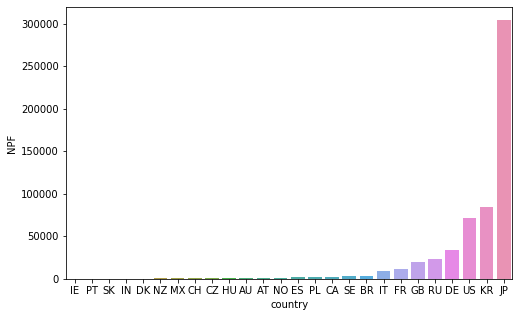

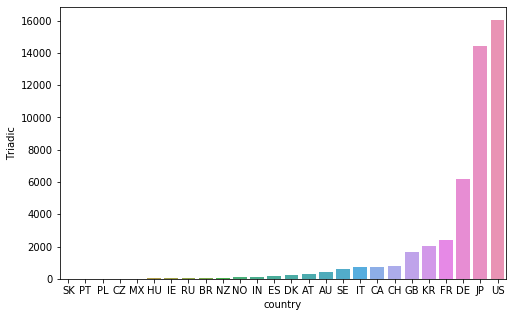

In [16]:
# Visualization of # of National Patents Filling by Countries
plt.figure(figsize=(8,5))
Graph4 = df.groupby(["country"])['NPF'].aggregate(np.median).reset_index().sort_values('NPF')
sns.barplot(x='country', y="NPF", data=df, order=Graph4['country'])
plt.show()

# Visualization of # of Triadic Patents by Countries
plt.figure(figsize=(8,5))
Graph5 = df.groupby(["country"])['Triadic'].aggregate(np.median).reset_index().sort_values('Triadic')
sns.barplot(x='country', y="Triadic", data=df, order=Graph5['country'])
plt.show()



- Japan has the most number of Domestic patents count, it has more than all the other countries npf combined.
- For the Triadic patents count, US has slightly more than Japan 

In [224]:
dfp = df[['NPF','Triadic']]
print (dfp.describe(percentiles=[.05, .25, .75, .95]))

                 NPF       Triadic
count      26.000000     26.000000
mean    22176.036454   1813.269231
std     61468.110799   4161.307185
min        60.571000      3.000000
5%        121.082350      9.250000
25%       447.666150     48.500000
50%      1447.584304    200.000000
75%     11025.985941    773.500000
95%     81236.822094  12365.000000
max    304470.127618  16037.000000


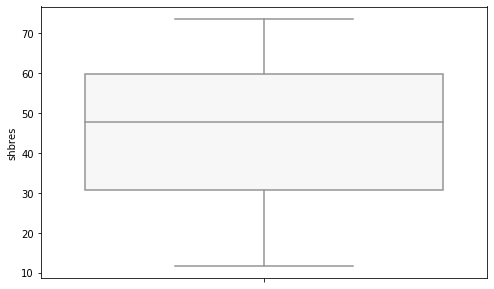

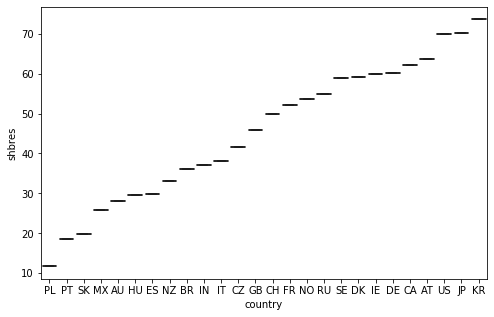

In [17]:
#percentage researchers in the business sector for each countries
Graph2 = df.groupby(["country"])['shbres'].aggregate(np.median).reset_index().sort_values('shbres')
plt.figure(figsize=(8,5))
sns.boxplot(y="shbres", data=df, palette="PRGn",order=Graph2['country'])
plt.figure(figsize=(8,5))
sns.boxplot(x='country',y="shbres", data=df, palette="PRGn",order=Graph2['country'])
plt.show()

- In the US, Japan, and Korea, more than 70% of domestic researchers are working in the private sectors.
- Despite that Poland has an average number of researchers relative to the other countries, it has the lowest percentage of private sector participation.

In [1]:
# ip_index per countries, relative patents right for countries
plt.figure(figsize=(8,5))
plt.xticks(rotation= 45)
Graph3 = df.groupby(["country"])['ip_index'].aggregate(np.median).reset_index().sort_values('ip_index')
sns.barplot(x='country', y="ip_index", data=df, order=Graph3['country'])
plt.show()

NameError: name 'plt' is not defined

Intellectual Property(IP) Index is an indicator of the strength of patentability environment for innovation in each country.

Despite the fact that Japan has the second most number of researchers, its patents right is not as strong as the other countries which have an IP Index of 4 or higher.

# Diagonal Correlation Matrix
Visualizing correlation matrix into a heatmap helps to identify most and least correlated variables quickly.

In [188]:
df.corr()

,gerd_res,def_gboard,shbrd,shbres,shbasr,Triadic,Researchers,HKI,FEES,ip_index,...,lndef_gboard,lnshbrd,lnshbres,lnshbasr,lnTriadic,lnResearchers,lnHKI,lnFEES,lnip_index,lnNPF
gerd_res,1.000000,-0.018343,0.517996,0.589378,-0.224856,0.386181,0.274802,0.129269,-0.104010,0.563459,...,-0.089964,0.500759,0.629858,-0.169119,0.698269,0.249676,0.124361,0.021725,0.512258,0.302811
def_gboard,-0.018343,1.000000,0.219844,0.277563,-0.383970,0.375263,0.661602,0.045340,0.554017,0.142530,...,0.389373,0.181519,0.280143,-0.393119,0.344000,0.691862,-0.024416,0.471791,0.092690,0.481692
shbrd,0.517996,0.219844,1.000000,0.812440,-0.437735,0.385067,0.324751,0.528668,-0.172263,0.739389,...,0.039878,0.987060,0.793106,-0.452179,0.598695,0.309998,0.548261,0.070854,0.747963,0.469294
shbres,0.589378,0.277563,0.812440,1.000000,-0.642612,0.507200,0.465366,0.333192,0.164569,0.617856,...,-0.038915,0.761302,0.971280,-0.648794,0.739465,0.468623,0.294987,0.338131,0.581985,0.547161
shbasr,-0.224856,-0.383970,-0.437735,-0.642612,1.000000,-0.255870,-0.298871,-0.025864,-0.428670,-0.117865,...,0.066424,-0.389779,-0.652200,0.990126,-0.426027,-0.461057,0.032278,-0.606080,-0.082970,-0.416041
Triadic,0.386181,0.375263,0.385067,0.507200,-0.255870,1.000000,0.911709,0.147236,0.142606,0.459152,...,0.191014,0.346361,0.423616,-0.277838,0.702498,0.719566,0.146292,0.244140,0.408726,0.681132
Researchers,0.274802,0.661602,0.324751,0.465366,-0.298871,0.911709,1.000000,0.124381,0.338629,0.391932,...,0.243177,0.290879,0.392654,-0.314596,0.605014,0.794962,0.111176,0.394605,0.335870,0.663389
HKI,0.129269,0.045340,0.528668,0.333192,-0.025864,0.147236,0.124381,1.000000,-0.581504,0.768981,...,0.172346,0.576604,0.273312,-0.042715,0.355349,0.095611,0.977797,-0.412816,0.812722,0.260621
FEES,-0.104010,0.554017,-0.172263,0.164569,-0.428670,0.142606,0.338629,-0.581504,1.000000,-0.429780,...,0.075965,-0.270908,0.180444,-0.434458,0.062392,0.397304,-0.670705,0.881427,-0.504129,0.087570
ip_index,0.563459,0.142530,0.739389,0.617856,-0.117865,0.459152,0.391932,0.768981,-0.429780,1.000000,...,0.023657,0.767313,0.587383,-0.115384,0.677817,0.288307,0.763671,-0.269472,0.992096,0.461215


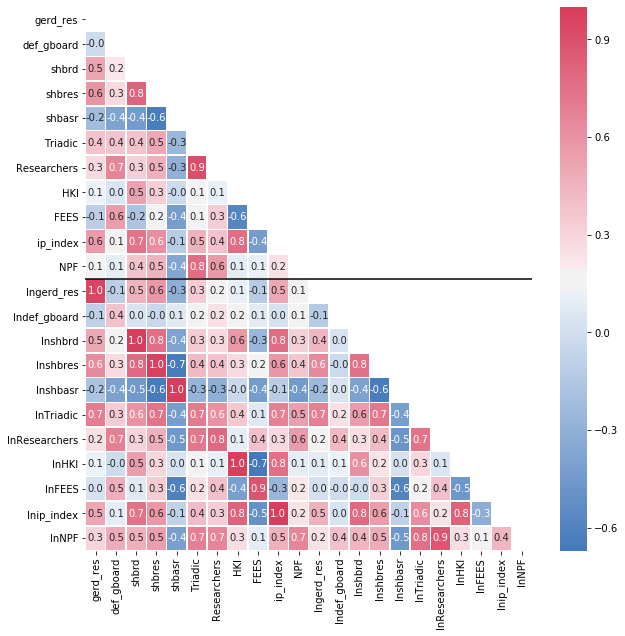

In [19]:
#Creating the Heatmap using Seaborn
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 5, as_cmap=True)
sns.heatmap(df.corr(), mask=mask,cmap=cmap, annot=True, linewidths=0.5,linecolor="white", fmt= '.1f',ax=ax,)
ax.hlines([11], *ax.get_xlim())
plt.show()

Informative observations can be made from this heatmap, for example:

- Both Human Capital Index(lnHKI) and the percentage of domestic expenditures on R&D from the business sectors(shbrd) is strongly, positively correlated with Patent Right Index(lnip_index), with correlation coefficients of 0.8 and 0.7 respectively.

# Linkage 


We begin our analysis by looking at the linkage between the number of patents (both national and Triadic patents) and the number of researchers in the countries. 

From the correlation matrix above, 

Correlation between $ln(NPF)$ and $ln(Researchers)$ is 0.9 

Correlation between $ln(Triadic)$ and $ln(Researchers)$ is 0.7

In [310]:
#Simple operations to show more precise numerical values of correlation coefficients
dfn =df[['lnNPF','lnResearchers']]
print (dfn.corr()) 

dft = df[['lnTriadic','lnResearchers']]
print (dft.corr())

#0.874 AND 7.45

                  lnNPF  lnResearchers
lnNPF          1.000000       0.873553
lnResearchers  0.873553       1.000000
               lnTriadic  lnResearchers
lnTriadic       1.000000       0.744667
lnResearchers   0.744667       1.000000


It shows the positive correlation between the number of researchers and the number of patents

- Correlation between $ln(NPF)$ and $ln(Researchers)$ is 0.874.
- Correlation between $ln(Triadic)$ and $ln(Researchers)$ is 0.745.

Now, we compute the least squares fit of logarithms of Patents and Researchers (Short regression).

In [308]:
y = df['lnNPF']
x = df['lnResearchers']
# Short regression: OLS fit of log number of Researchers on log Number of National Patents
# Use White's (1980) heteroscedastic robust variance-covariance estimator

short_reg=sm.OLS(y,sm.add_constant(x)).fit(cov_type='HC0')
(short_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnNPF   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     97.16
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           6.51e-10
Time:                        02:51:43   Log-Likelihood:                -38.355
No. Observations:                  26   AIC:                             80.71
Df Residuals:                      24   BIC:                             83.23
Df Model:                           1                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.5737      1.579     -5.429      0.000     -11.669      -5.478
lnResearchers     1.4752      0.150      9.857      0.000       1.182       1.768
==============================================================================
Omnibus:                        3.948   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.263
Skew:                          -0.502   Prob(JB):                        0.323
Kurtosis:                       4.039   Cond. No.                         96.6
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

- Coefficient, standard error and z-score of lnResearchers  are 1.475,0.15 and 9.8 respectively. (clustered standard error, high z-score)
- The short regression result of $R^2 = 0.763$ is statistically significant. 

- Interpretation would be 1.47% change in the number of national Patents is induced by of 1% change in the number of researchers.

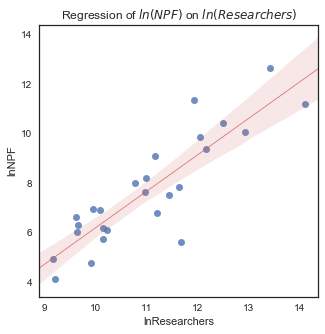

In [301]:
#Short Regression Plot of lnNPF on lnResearchers
plt.figure(figsize=(5,5))
sns.regplot(x="lnResearchers", y="lnNPF", data=df,line_kws={"color":"r","alpha":0.7,"lw":1})
plt.title("Regression of $ln(NPF)$ on $ln(Researchers)$")
plt.show()

In [285]:
y = df['lnTriadic']
x1 = df['lnResearchers']
# Short regression: OLS fit of log number of Researchers on log Number of Triadic Patents
# Use White's (1980) heteroscedastic robust variance-covariance estimator

short_reg=sm.OLS(y,sm.add_constant(x1)).fit(cov_type='HC0')
(short_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnTriadic   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     31.00
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           9.96e-06
Time:                        02:07:35   Log-Likelihood:                -47.428
No. Observations:                  26   AIC:                             98.86
Df Residuals:                      24   BIC:                             101.4
Df Model:                           1                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.9737      2.535     -3.540      0.000     -13.942      -4.005
lnResearchers     1.3000      0.233      5.568      0.000       0.842       1.758
==============================================================================
Omnibus:                        4.352   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.248
Skew:                          -0.865   Prob(JB):                        0.197
Kurtosis:                       3.079   Cond. No.                         96.6
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

- Coefficient, standard error and z-score of lnResearchers  are 1.3,0.233 and 5.5 respectively. (clustered standard error, high z-score)
- $R^2 = 0.56$, The short regression result is statistically significant. 

-interpretation would be 1.3% change in the number of national Patents is induced by of 1% change in the number of researchers.

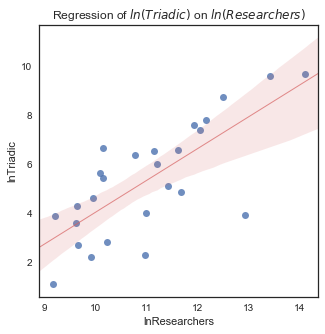

In [414]:
#Short Regression Plot of lnTriadic on lnResearchers
plt.figure(figsize=(5,5))
sns.regplot(x="lnResearchers", y="lnTriadic", data=df,line_kws={"color":"r","alpha":0.7,"lw":1})
plt.title("Regression of $ln(Triadic)$ on $ln(Researchers)$")
plt.show()

These results are relatively weak considering the spaces are in two dimension, also there exists omitted factors. However, the positive correlations between the number of researchers and the number of patents suggest that using researchers as a measure of R&D is an acceptable approach. 

# Long Regression adding Patents Index

In [338]:
y3 = df['lnNPF']
x3 = df[['lnResearchers','lnip_index']]
# long R: OLS fit of log number of Researchers on log Number of National Patents
# Use White's (1980) heteroscedastic robust variance-covariance estimator

long_reg1=sm.OLS(y3,sm.add_constant(x3)).fit(cov_type='HC0')
(long_reg1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnNPF   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     41.94
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           2.13e-08
Time:                        05:02:08   Log-Likelihood:                -34.670
No. Observations:                  26   AIC:                             75.34
Df Residuals:                      23   BIC:                             79.11
Df Model:                           2                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.6088      2.233     -5.199      0.000     -15.985      -7.232
lnResearchers     1.3755      0.162      8.473      0.000       1.057       1.694
lnip_index        3.0923      1.199      2.579      0.010       0.742       5.443
==============================================================================
Omnibus:                        0.181   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.379
Skew:                           0.120   Prob(JB):                        0.827
Kurtosis:                       2.459   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

- Coefficient, standard error and z-score of lnResearchers are 1.376, 0.162 and 5.5 respectively. (clustered standard error, high z-score)
- Coefficient, standard error and z-score of lnip_index are 3.0, 1.1 and 2.6 respectively. (clustered standard error)
- The long regression result of $R^2 = 0.8$ shows that both variables are statistically significant. 

-interpretation would be 1.3% change in the number of national patents is induced by of 1% change in the number of researchers where holding lnip_index constant. Similarly 3.09% change in the number of national patents is induced by of 1% change in the patents right holding other variable constant

In [329]:
y4 = df['lnTriadic']
x4 = df[['lnResearchers','lnip_index']]
# long R: OLS fit of log number of Researchers on log Number of National Patents
# Use White's (1980) heteroscedastic robust variance-covariance estimator

long_reg=sm.OLS(y4,sm.add_constant(x4)).fit(cov_type='HC0')
(long_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnTriadic   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     43.24
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           1.61e-08
Time:                        04:38:30   Log-Likelihood:                -39.026
No. Observations:                  26   AIC:                             84.05
Df Residuals:                      23   BIC:                             87.83
Df Model:                           2                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -14.9489      2.243     -6.665      0.000     -19.345     -10.553
lnResearchers     1.1037      0.214      5.169      0.000       0.685       1.522
lnip_index        6.0881      1.857      3.278      0.001       2.448       9.728
==============================================================================
Omnibus:                        6.002   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.070
Skew:                          -0.746   Prob(JB):                        0.131
Kurtosis:                       4.238   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

- Coefficient, standard error and z-score of lnResearchers are 1.1037, 0.214 and 5.1 respectively. (clustered standard error, high z-score)
- Coefficient, standard error and z-score of lnip_index are 6.0, 1.86 and 3.28 respectively. (clustered standard error)
- $R^2 = 0.76$, The long regression result of shows that both variables are statistically significant.  

-interpretation would be 1.1% change in the number of Triadic patents is induced by of 1% change in the number of researchers where holding lnip_index constant. Similarly 6% change in the number of Triadic patents is induced by of 1% change in the patents right holding other variable constant.

It is also important to note that $R^2$ increased significantly from 0.55 to 0.76 when lnip_index is added

In [323]:
#Auxiliary linear regression OLS fit of lnip_index on Researchers 
xa1= df['lnResearchers']
ya1= df['lnip_index']
aux_reg=sm.OLS(ya1,sm.add_constant(xa1)).fit(cov_type='HC0')
(aux_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lnip_index   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.503
Date:                Tue, 15 Jan 2019   Prob (F-statistic):              0.127
Time:                        04:35:03   Log-Likelihood:                 9.1870
No. Observations:                  26   AIC:                            -14.37
Df Residuals:                      24   BIC:                            -11.86
Df Model:                           1                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9815      0.220      4.452      0.000       0.549       1.414
lnResearchers     0.0322      0.020      1.582      0.114      -0.008       0.072
==============================================================================
Omnibus:                       17.455   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.289
Skew:                          -1.607   Prob(JB):                     3.93e-05
Kurtosis:                       5.898   Cond. No.                         96.6
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [335]:
xa1= df['lnResearchers']
ya1= df['lnip_index']
aux_reg1=sm.OLS(xa1,sm.add_constant(ya1)).fit(cov_type='HC0')
(aux_reg1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lnResearchers   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.186
Date:                Tue, 15 Jan 2019   Prob (F-statistic):              0.287
Time:                        04:48:18   Log-Likelihood:                -42.701
No. Observations:                  26   AIC:                             89.40
Df Residuals:                      24   BIC:                             91.92
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6971      2.118      4.106      0.000       4.546      12.849
lnip_index     1.7450      1.602      1.089      0.276      -1.396       4.886
==============================================================================
Omnibus:                        1.813   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.409
Skew:                           0.383   Prob(JB):                        0.494
Kurtosis:                       2.156   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

The Auxillary regression result shows that Number of Researchers in the countries does not systematically varies with the Patents right index. 

In [383]:
#Residual Regression 
#Auxiliary regression of # patents right index onto Researchers
aux_reg=sm.OLS(ya1,sm.add_constant(xa1)).fit(cov_type='HC0')
V = pd.DataFrame({'Res_aux':aux_reg.resid})

# Compute residual regression
res_reg=sm.OLS(y4,V,hasconst=False).fit(cov_type='HC0')
(res_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnTriadic   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6041
Date:                Tue, 15 Jan 2019   Prob (F-statistic):              0.444
Time:                        11:30:04   Log-Likelihood:                -82.255
No. Observations:                  26   AIC:                             166.5
Df Residuals:                      25   BIC:                             167.8
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Res_aux        6.0881      7.833      0.777      0.437      -9.265      21.441
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.615
Skew:                           0.220   Prob(JB):                        0.735
Kurtosis:                       2.388   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [333]:
#for NPF
res_reg1=sm.OLS(y,V,hasconst=False).fit(cov_type='HC0')
(res_reg1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnNPF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1256
Date:                Tue, 15 Jan 2019   Prob (F-statistic):              0.726
Time:                        04:47:58   Log-Likelihood:                -90.897
No. Observations:                  26   AIC:                             183.8
Df Residuals:                      25   BIC:                             185.1
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Res_HGC        3.0923      8.726      0.354      0.723     -14.011      20.196
==============================================================================
Omnibus:                        1.080   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.030
Skew:                           0.416   Prob(JB):                        0.598
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

The coefficient on lnResearchers in the long regression reflects the covariance between log number of patents and that component of lnResearchers is uncorrelated with the additional included/auxiliary variables. 

Number of Researcher is a good approach of measuring R&D

# Model Assumptions     
   # 1. Functions 

The objective of our study is to create a model and examine the Patent and R&D linkage.

We are considering following two functions,

- $Inventions$ = $f$(R&D)
    
    Invention as a function of Research and Development which captures the variables that affect the productivity of the research 


- $Patents$ = $g(Inventions)$ 

     Patent as a function of Inventions which captures the variables that affect the propensity to patent
     
     
Although there are many other patents and various ways to count the patents, we will only focus on national patents and Triadic patents for this study.

The dependant variables of the model are National Patents ($npf$) and Triadic Patents ($Triadic$) .

Different models will be constructed for each of these dependant variables.


   # 2. Productivity of R&D
   
   Productivity of R&D varies across the countries and there are number of factors that may affects the productivity
 
- Education, we hypothesize that countries with better education environment would lead to more skilled researchers, hence lead to more invention. HKI is a human capital index, it presents the skills available for innovation in the country and is calculated from the literacy rate, secondary and tertiary enrolments


- Private sector research environment: we hypothesize that research is more productive in a high pressured, more rewarding environment, thus researches in the private sector are more productive than theose in the public sector; we will use $shbrd$ (research expenditure from the private sector) and $shbres$ (number of researchers in the private sector). 


-  Research fundings: potentially countries with higher value of $gerd_res$, expenditure on R&D per researcher, have higher productivity. More funds to do the particular research may raise the productivity since experiments, data collection, and resources could be costly.


let $\Phi$ be a productivity of the R&D and following the assumption above, we can obtained the parameters of each variables to see the impact. which  

$\Phi = \rho_1 *HKI + \rho_2 * shbres + \rho_3 * gerd_res$ 

the values of $\rho_1$,  $\rho_2$, $\rho_3$ can be obtained from the Regression estimate, (we assume that assumptions for the least square estimator holds, A1-A5)
# 3. Propensity to Patent 
Propensity to Patent also varies for each country. With our assumption, we consider two factors, which are policies for patents and the type of researches.

- As 
policies for patents may affect the number of inventions to be patented, we consider the ipindex
,which is the level of protection rights of patents for a country, and FEES
,which is the average cumulative administrative fees for all the patents of a country.


- We assume that there are three different types of research: basic research, defence oriented research and business research. The basic research and defense-oriented research may lead to less patent filing, as basic research is not aimed toward to the market or products but pure sicence researches that involve with theories, in such there maybe less incentives to engage in the patent filing activity. For the defence oriented research, governments may keep their inventions secret rather than filing for the patents.. We will use $shbrd$, $shbasr$  ,and 
$def$_$gboard$ from the data

Let $\Omega$ be a propensity to patents, then we can write a linear equation of $\Omega$ by taking the above assumptions which

$\Omega = \rho_0 + \rho_1 *$ $ip$_$index$ $+ \rho_2 *Fees + \rho_3 *shbrd + \rho_4 * shbasr + \rho_5 $* $def$_$gboard$ 

(We assume that assumptions for the least square estimator holds, A1-A5)
# 4. Model
Let $R$  be the number of researchers and consider as a measurement of R&D, and $I$ be the inventions. Intuitively more researchers will lead to higher degree of R&D in the region. Considering the invention function and the productivity of R&D assumption above, 

$$I = R^\Phi * R$$

Taking the natural log of the above equation, 

$$ln(I) = ln(R^\Phi * R)$$
$$ln(I) = \Phi*ln(R) +ln(R)$$

Substitute $\Phi$ from above

$$ln(I)= (\rho_1* HKI  +  \rho_2 *shbres +  \rho_3 * gerdres)*ln(R) + ln(R)$$



$(1)$ $$ln(I) = \beta_0 + \beta_1 * ln(R) +\rho_1* HKI * ln(R) +  \rho_2 *shbres *ln(R) + $$

$$\rho_3 *gerdres*ln(R)$$

The coefficionts of $\beta_n$ and $\rho_n$ are the parameters of the equation and will be estimated by the Least Square regression 

Now consider the second function 
$$Patent = g(Inventions)$$

Let $P$ be a Patent and $\Omega$ be a propensity to patents introduced above

$$ P = \Omega * I $$

Taking the natual logs of the above equation then we get 

$$ln(P) = ln(\Omega) + ln(I)$$

$$ln(P) = ln(\rho_0 + \rho_1 * ip_index + \rho_2 *FEES + \rho_3 *shbrd + \rho_4 * shbasr + \rho_5*def_gboard) + ln(I)$$

$(2)$  $$ln(P) = \alpha_0*ln(ip_index) + \alpha_1*ln(FEES)+\alpha_2*ln(shbrd)+\alpha_3*ln(shbasr)+\alpha_4*ln(def_gboard) + ln(I) + ln(\rho_0)$$

For last, we combine the Equation we derived above $(1)$ and $(2)$

$$ln(P) = ln(\Omega) + ln(I)$$

$$ ln(P) = \alpha_0*ln(ip_index) + \alpha_1*ln(FEES) + \alpha_2*ln(shbrd) + \alpha_3*ln(shbasr) + \alpha_4*ln(deg_gboard) + \beta_0 + \beta_1 * ln(R) +\rho_1* HKI * ln(R) +  \rho_2 *shbres *ln(R) + \rho_3 *gerdres*ln(R)$$ 


By reorganizing the equation our model becomes 

$ln(P) = \gamma_0 + \gamma_1*ln(ipindex)+ \gamma_2*ln(FEES) + \gamma_3 * ln(shbrd)+\gamma_4*ln(shbasr)+\gamma_5*ln(defgboard) + \gamma_6 *ln(R) + \gamma_7*(HKI*ln(R)) + \gamma_8 *(shbres*ln(R)) +\gamma_9 *(gerders*ln(R))$

For the simplicity, $\gamma_n$ is used for parameters of the model and replaces $\alpha_n,\beta_n,\rho_n$, 

$\gamma_M$ where M= 7,8,9 is also used for the productivity measure, all the parameters will be estimated by the Least Square Regression. 

# Estimation and Interpretation

In [361]:
DFL = df

In [367]:
#Creating new interactive terms with respect to our model above

DFL['lnR_X_HKI'] = DFL['lnResearchers']*DFL['HKI']
DFL['lnR_X_shbres'] = DFL['lnResearchers']*DFL['shbres']
DFL['lnR_X_gerdres'] = DFL['lnResearchers']*DFL['gerd_res']

/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [406]:
YL1 = df['lnNPF']
YL2 = df['lnTriadic']
XL = DFL[['lnip_index','lnFEES','lnshbrd','lnshbasr','lndef_gboard','lnResearchers','lnR_X_HKI','lnR_X_shbres','lnR_X_gerdres']]

# long R with our model: OLS fit of regressors above on National Patents filing
# Use White's (1980) heteroscedastic robust variance-covariance estimator

long_regL1=sm.OLS(YL1,sm.add_constant(XL)).fit(cov_type='HC0')
long_regL1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnNPF   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           1.01e-08
Time:                        12:42:24   Log-Likelihood:                -29.602
No. Observations:                  26   AIC:                             79.20
Df Residuals:                      16   BIC:                             91.79
Df Model:                           9                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.1972      4.829     -0.455      0.649     -11.663       7.268
lnip_index        4.1095      3.089      1.330      0.183      -1.945      10.164
lnFEES           -0.9038      0.261     -3.469      0.001      -1.415      -0.393
lnshbrd          -0.0115      1.040     -0.011      0.991      -2.050       2.027
lnshbasr         -1.3589      0.698     -1.947      0.052      -2.727       0.009
lndef_gboard      0.0211      0.028      0.749      0.454      -0.034       0.076
lnResearchers     1.5660      0.203      7.728      0.000       1.169       1.963
lnR_X_HKI        -0.3277      0.182     -1.800      0.072      -0.685       0.029
lnR_X_shbres      0.0020      0.002      1.011      0.312      -0.002       0.006
lnR_X_gerdres    -0.4272      0.246     -1.740      0.082      -0.908       0.054
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.472
Skew:                           0.241   Prob(JB):                        0.790
Kurtosis:                       2.549   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression result, for National Patents Count | Adjusted $R^2 = 0.81 $

AS

$lnFEES = -0.9,(0.01)$

$lnResearchers =1.57,(0)$

$lnshbrd = -1.36,(0.52)$

all coefficients are statistically significant.


Percent change in the National Patents fililing is induced by 1% change in (Average Patents Fees,Number of researchers, and the proportion of the basic research expenditure) holding other variables constant

In [413]:
# long R with our model: OLS fit of regressors above on Triadic Patents filing
# Use White's (1980) heteroscedastic robust variance-covariance estimator
long_regL2=sm.OLS(YL2,sm.add_constant(XL)).fit(cov_type='HC0')
long_regL2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnTriadic   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     28.79
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           3.17e-08
Time:                        13:09:46   Log-Likelihood:                -25.457
No. Observations:                  26   AIC:                             70.91
Df Residuals:                      16   BIC:                             83.50
Df Model:                           9                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4229      5.757      0.595      0.552      -7.861      14.707
lnip_index        3.6704      2.214      1.658      0.097      -0.669       8.010
lnFEES           -0.2762      0.335     -0.825      0.409      -0.932       0.380
lnshbrd          -1.6576      0.923     -1.796      0.073      -3.467       0.152
lnshbasr         -0.9565      0.890     -1.075      0.282      -2.701       0.788
lndef_gboard      0.0222      0.010      2.157      0.031       0.002       0.042
lnResearchers     0.4136      0.171      2.414      0.016       0.078       0.749
lnR_X_HKI         0.0127      0.133      0.095      0.924      -0.249       0.274
lnR_X_shbres      0.0034      0.001      2.320      0.020       0.001       0.006
lnR_X_gerdres     1.1782      0.303      3.891      0.000       0.585       1.772
==============================================================================
Omnibus:                        1.498   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.206
Skew:                          -0.328   Prob(JB):                        0.547
Kurtosis:                       2.174   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression result, for Triadic Patents Count | Adjusted $R^2 = 0.87 $

As

$lndef_gboard = 0.0222,(0.031)$

$lnResearchers = 0.4136,(0.016)$

lnR_X_gerdres = 1.1782,(0)

All coefficients are statistically significant.


% change in the Triadic Patents count is induced by 1% change in (Share of defence oriented research,Number of researchers) holding other factors constant

# Result of Analysis
Two regressions were performed based on the model that we derived. Dependent variables are $ln(NPF)$ and $ln(Triadic)$, 

- The variable ln(FEES) is statistically significant and has a negative effect on the national patents counts, but it is not statistically significant considering the number of Triadic patents. From this result we can infer that the patent fees are relatively important at the national level (filing the patent in one country only). However, when the invention needs to be protected at an international level, fees are not as important.


- Private sector researches do not have any significant impact on both national patents and international patents filings. Basic research has a negative impact at the national level, As defence oriented research has a positive impact on the Triadic patents filings, we can consider international factors in the defence oriented research.

- As examined earlier, the number of researchers has a significant effect on both patents: more researchers will lead to more inovations, thus more patents.


- The ip_index and the level of patents protection rights do not have significant effect on both patents. Inventors still file the patents regardless of the level of national patents rights. Also, considering the Triadic Patents, we may have to make measurements different from the domestic level.


- The human capital index (HKI) which also shows the education policies did not have a statistical significancy on researchers productivity. Which went against our original assumption such that better education environment creates better researchers which raise the R&D level.


- Expenditure on R&D per researcher (gerd_res) has a significant positive effect on the productivity. It tells us that when the researchers have more funds they can potentially have better facilities, equipments, or can engage in researches that need high cost lab environments, thus having more R&D fundings increases the productivity. 






# Validity of the Model
- The variables are mainly collected from the reliable sources such as OECD,UIS, UN Report. However, it is not from one source, thus, the model potentially be inconsistent and may have a measurement error.


- Reverse Causality, It is possible that the research environment is driven from the patents which knowledge and inventions of patents will lead to extension of the researches, thus new patents. Countries may have this factor, however, our data consists of 26 different countries. Also the invention production function we used to derive the model has been carefully studied and discussed in many economic literatures, thus it's very unlikely to have RC.


- Our dataset includes almost all the available data from OECD, thus unlikely to have a sample selection bias. However, during the data clean up process, some of the high R&D driven countries were dropped (such as Singapore and China), which potentially could made a difference in our analysis.


- As we only considered three kinds of researches: basic, private and defence oriented, omitted variable bias may exist, which is common to find in the most economic studies. If we could obtain the dataset that precisely classify the fields of researches, we could potentially control various research subjects (ex: biotech, engineering, medical, electronics...)


- Our model may not work with different countries or different datasets as it has specific assumptions. It also may not be applicable to the general case, which may hinder the external validity of the model. In addition, for emerging or developing countries, more education or policy factors should be considered relevant to our model, as typically developed countries have higher R&D rate.

# Discussion
- If complete datasets were to be available for other years, it would be interesting to utilise those data to perform a panel data analysis, as we could potentially perform differential regressions for multiple year periods to control a noise that exists within the year. We can also perform an analysis on a growth rate of different factors in the models by using panel data. 
- For future references, I want to further develop the study with more comprehensive datasets and potentially implementing other methodologies to perform my analysis (such as non linear, unsupervised learning, etc).

# Reference
- OECD. (n.d.). Frascati Manual 2015. Retrieved January 14, 2019, from “https://read.oecd-ilibrary.org/science-and-technology/frascati-manual-2015_9789264239012-en”


- Romer, Paul M. "Increasing Returns and Long—Run Growth." Journal of Political Economy 94 (October 1986): 1002—1037.


- Charles I. Jones & Paul M. Romer, 2010. "The New Kaldor Facts: Ideas, Institutions, Population, and Human Capital," American Economic Journal: Macroeconomics, American Economic Association, vol. 2(1), pages 224-45, January.


- National Science Technology Management Information System (NSTMIS). (2013). 17-government expenditure on r&d by sub-sector of economic activity, [Online]. Available: http://www.nstmis-dst.org/SnT-Indicators2011-12.aspx.


- UNESCO, Science Report 2010. The Current Status of Science around the World. Paris: UNESCO publishing, 2010, p. 105.